In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, Imputer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [21]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.drop(columns=['Ticket', 'Name', 'Cabin'], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [23]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
def check_missing_data(df):
    columns = df.columns
    for i in columns:
        if pd.isna(df[i]).sum(axis = 0) > 0:
            print('Column: {} has {} NaN value'.format(i, pd.isna(df[i]).sum(axis = 0)))

In [25]:
check_missing_data(df)

Column: Age has 177 NaN value
Column: Embarked has 2 NaN value


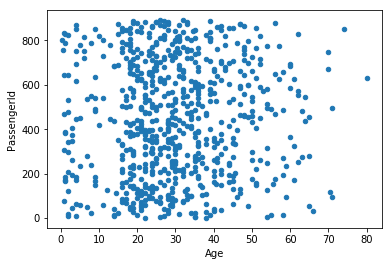

In [26]:
df.plot.scatter('Age', 'PassengerId')

In [27]:
# Show Values
df['Age'] = df['Age'].fillna(value=df['Age'][df.Age > 0].mean())
# df.loc[df.Age.isna()] = df['Age'][df.Age > 0].mean()
check_missing_data(df)

Column: Embarked has 2 NaN value


In [28]:
df.groupby('Embarked').Embarked.value_counts()

Embarked  Embarked
C         C           168
Q         Q            77
S         S           644
Name: Embarked, dtype: int64

In [29]:
df['Embarked'] = df['Embarked'].fillna(value='S')
check_missing_data(df)

In [30]:
# imputer = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
# imputer.fit(forecasters[:, 2:9])
# forecasters[:, 2:9] = imputer.transform(forecasters[:, 2:9])

In [31]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [32]:
forecasters = df.iloc[:, 2:9].values
forecasters

array([[3, 'male', 22.0, ..., 0, 7.25, 'S'],
       [1, 'female', 38.0, ..., 0, 71.2833, 'C'],
       [3, 'female', 26.0, ..., 0, 7.925, 'S'],
       ...,
       [3, 'female', 29.69911764705882, ..., 2, 23.45, 'S'],
       [1, 'male', 26.0, ..., 0, 30.0, 'C'],
       [3, 'male', 32.0, ..., 0, 7.75, 'Q']], dtype=object)

In [33]:
classes = df.iloc[:, 1].values
classes

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [34]:
forecasters_label_encoder = LabelEncoder()
forecasters[:, 1] = forecasters_label_encoder.fit_transform(forecasters[:, 3])
forecasters[:, 6] = forecasters_label_encoder.fit_transform(forecasters[:, 6])
forecasters

array([[3, 1, 22.0, ..., 0, 7.25, 2],
       [1, 1, 38.0, ..., 0, 71.2833, 0],
       [3, 0, 26.0, ..., 0, 7.925, 2],
       ...,
       [3, 1, 29.69911764705882, ..., 2, 23.45, 2],
       [1, 0, 26.0, ..., 0, 30.0, 0],
       [3, 0, 32.0, ..., 0, 7.75, 1]], dtype=object)

In [35]:
scaler = StandardScaler()
forecasters = scaler.fit_transform(forecasters)
forecasters

/home/martoso/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/martoso/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.82737724,  0.49004387, -0.5924806 , ..., -0.47367361,
        -0.50244517,  0.58595414],
       [-1.56610693,  0.49004387,  0.63878901, ..., -0.47367361,
         0.78684529, -1.9423032 ],
       [ 0.82737724, -0.50455542, -0.2846632 , ..., -0.47367361,
        -0.48885426,  0.58595414],
       ...,
       [ 0.82737724,  0.49004387,  0.        , ...,  2.00893337,
        -0.17626324,  0.58595414],
       [-1.56610693, -0.50455542, -0.2846632 , ..., -0.47367361,
        -0.04438104, -1.9423032 ],
       [ 0.82737724, -0.50455542,  0.17706291, ..., -0.47367361,
        -0.49237783, -0.67817453]])

In [40]:
estimator = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
estimator.fit(forecasters, classes)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
df_test.drop(columns=['Ticket', 'Name', 'Cabin'], inplace=True)
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [43]:
# Show Values
df_test['Age'] = df_test['Age'].fillna(value=df_test['Age'][df_test.Age > 0].mean())
# df.loc[df.Age.isna()] = df['Age'][df.Age > 0].mean()
check_missing_data(df_test)

Column: Fare has 1 NaN value


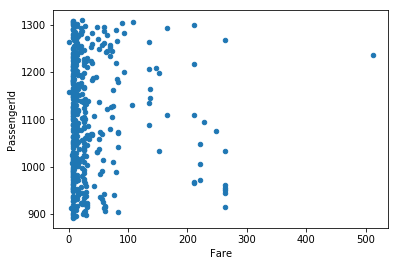

In [56]:
df_test.plot.scatter('Fare', 'PassengerId')

In [82]:
df_test['Fare'] = df_test['Fare'].fillna(value=df_test['Fare'][df_test.Fare < 500].mean())
check_missing_data(df_test)

In [83]:
df_test[df_test.isna().any(axis=1)]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


Column: Age has 86 NaN value
Column: Fare has 1 NaN value
Column: Fare has 1 NaN value


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


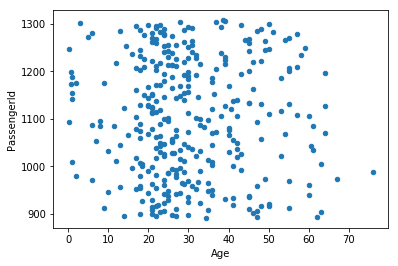

In [87]:
df_test = pd.read_csv('test.csv')
df_test.head()

df_test.drop(columns=['Ticket', 'Name', 'Cabin'], inplace=True)
df_test.head()

df_test.describe()

def check_missing_data(df):
    columns = df.columns
    for i in columns:
        if pd.isna(df[i]).sum(axis = 0) > 0:
            print('Column: {} has {} NaN value'.format(i, pd.isna(df[i]).sum(axis = 0)))
            
check_missing_data(df_test)

df_test.plot.scatter('Age', 'PassengerId')

# Show Values
df_test['Age'] = df_test['Age'].fillna(value=df_test['Age'][df_test.Age > 0].mean())
# df.loc[df.Age.isna()] = df['Age'][df.Age > 0].mean()
check_missing_data(df_test)

df_test['Fare'] = df_test['Fare'].fillna(value=df_test['Fare'][df_test.Fare < 500].mean())
check_missing_data(df_test)

df_test[df_test.isna().any(axis=1)]

df_test.groupby('Embarked').Embarked.value_counts()

df_test['Embarked'] = df_test['Embarked'].fillna(value='S')
check_missing_data(df_test)

df_test.head()
